In [1]:
from utils.functions import precios
import pandas as pd
pd.set_option('max_colwidth', 100)
import numpy as np
import regex as re
import random
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["figure.figsize"] = (15,6)

### Importo DF de sentimiento, y los precios de los activos (librería yfinance)

In [2]:
import pandas as pd
df_sent = pd.read_csv('data/final_data.csv')

df_sent.tail(5)

,date,ticker,link,articles,spacy_summary,pegasus_one_line,sentiment
785,2023-02-14,msft,https://finance.yahoo.com//news/prices-are-still-going-up-and-consumers-are-still-spending-morni...,This article first appeared in the Morning Brief. Get the Morning Brief sent directly to your in...,"6:00 a.m. ET: NFIB Small Business Optimism, January (91.0 expected, 89.9 during prior month) 8:3...",Weekly take on events in the world economy and their fallout.,0
225,2023-03-01,tsla,https://finance.yahoo.com//news/timeline-elon-musk-missed-targets-110000795.html,March 1 (Reuters) - Tesla Inc Chief Executive Elon Musk is expected to lay out details of afford...,March 1 (Reuters) - Tesla Inc Chief Executive Elon Musk is expected to lay out details of afford...,Musk is expected to unveil details of affordable electric cars. EV maker has said it could build...,0
250,2023-03-02,goog,https://finance.yahoo.com//news/stock-market-news-today-march-2-2023-135533324.html,Stock futures were mixed on Thursday morning as investors digested more big tech earnings and co...,"Tesla (TSLA) shares were also in focus early Thursday, falling as much as 7% after the electric ...","Salesforce beats on earnings, raises share buyback plan. Tesla shares fall as much as 7% in earl...",1
400,2023-02-16,jnj,https://finance.yahoo.com//news/early-retirement-portfolio-15-stocks-001129511.html,"In this article, we discuss 15 best dividend stocks for retirement. You can skip our detailed an...","Last year, I wrote an article on Early Retirement Portfolio: 15 Stocks to Live Off Dividends, wh...","Johnson & Johnson, AbbVie are best for retirement stocks. American Power Electric Company is bes...",1
951,2023-02-27,GC=F,https://finance.yahoo.com//news/canada-stocks-shares-boost-tsx-221058134.html,"* TSX ends up 0.2% at 20,260.13 * Uni-Select shares surge 16.6% after takeover deal * Materials ...","""The overhang of possibly more interest rate rises is going to cloud market sentiment until eith...",Toronto's main stock index closes higher on Monday.,0


In [15]:
df_sent.to_csv('data/final_data.csv')

In [3]:
df_precios = precios(start='2023-02-14',end='2023-03-03',tickers=df_sent.ticker.unique())
df_precios.Date = pd.to_datetime(df_precios.Date)
df_precios.Date.dtypes

['aapl' 'tsla' 'goog' 'jnj' 'BTC-USD' 'amzn' 'msft' 'GC=F']


dtype('<M8[ns]')

### Comparación palabras medias por artículo en cada paso

In [4]:
df_sent['Artículos originales'] = df_sent.articles.apply(lambda x: len(x.split(' ')))
df_sent['Artículo resumido'] = df_sent.spacy_summary.apply(lambda x: len(x.split(' ')))
df_sent['En una línea'] = df_sent.pegasus_one_line.apply(lambda x: len(x.split(' ')))

print('Artículos originales :', np.mean(df_sent['Artículos originales']))
print('Artículo resumido :', np.mean(df_sent['Artículo resumido']))
print('En una línea :', np.mean(df_sent['En una línea']))

Artículos originales : 777.289896128423
Artículo resumido : 227.0462700661001
En una línea : 14.800755429650614


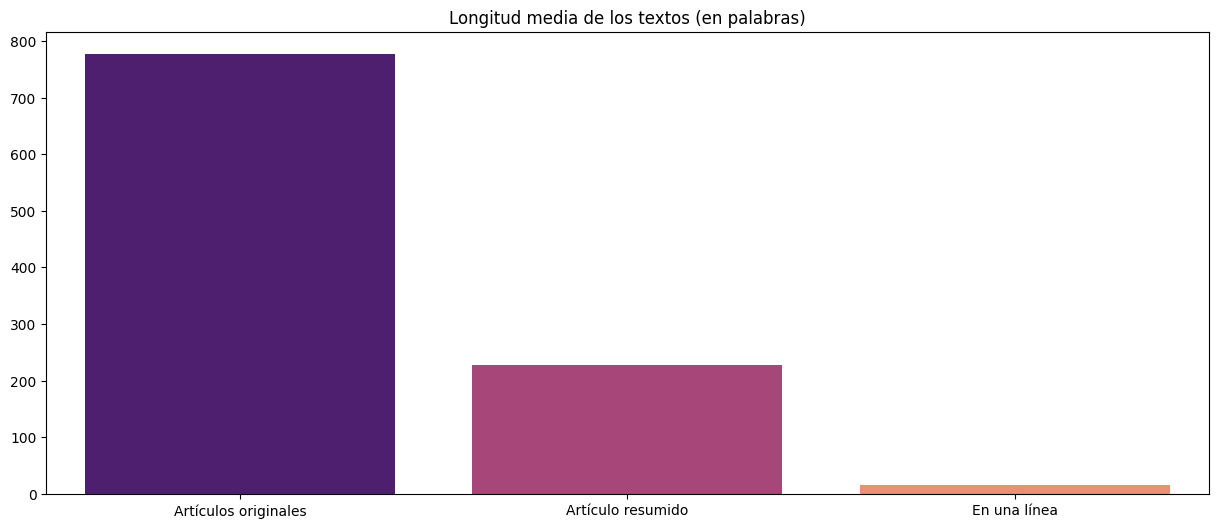

In [5]:
sns.barplot(data=df_sent[['Artículos originales','Artículo resumido','En una línea']],palette='magma',errorbar=None)
plt.title('Longitud media de los textos (en palabras)');

### Sentiment

In [6]:
df_sent = pd.read_csv('data/final_data.csv')
df_sent

,date,ticker,link,articles,spacy_summary,pegasus_one_line,sentiment
0,2023-03-02,aapl,https://finance.yahoo.com//news/mortgage-rates-surge-closer-to-7-170022384.html,"Mortgage rates jumped higher this week, getting even closer to 7% and crushing homebuyer activit...","“We'll find out in the next 30 days if buyers are getting used to higher rates,” Reynolds said, ...",Real estate broker sees fewer buyers this year. Condo rates hit a 28-year low this week,-1
1,2023-03-02,aapl,https://finance.yahoo.com//news/stock-market-news-today-march-2-2023-135533324.html,Stock futures were mixed on Thursday morning as investors digested more big tech earnings and co...,"Tesla (TSLA) shares were also in focus early Thursday, falling as much as 7% after the electric ...","Salesforce beats on earnings, raises share buyback plan. Tesla shares fall as much as 7% in earl...",1
2,2023-03-02,aapl,https://finance.yahoo.com//news/what-the-end-of-the-great-moderation-era-means-for-investors-mor...,This article first appeared in the Morning Brief. Get the Morning Brief sent directly to your in...,"""I would therefore expect greater inflation volatility, economic volatility, [and] geopolitical ...",Sonders sees near-term volatility as key to long-term success. Schwab strategist sees volatility...,1
3,2023-03-02,aapl,https://finance.yahoo.com//news/silvergate-stock-crashes-after-company-delays-annual-report-reve...,Shares of troubled lender Silvergate (SI) fell as much as 35% Thursday morning after the company...,Silvergate shares have collapsed over the last year as the company's entanglements with several ...,Here is a guide to the key events in the crypto world in the past 24 hours.,0
4,2023-03-01,aapl,https://finance.yahoo.com//news/stock-market-news-live-updates-march-1-2023-124448484.html,U.S. stocks finished mostly lower Wednesday to start March as key manufacturing data offered mix...,"However, Goolsbee, who will be a voter at this year’s policy-setting Federal Open Market Committ...",U.S. vaccine maker leans toward fiscal-hiking campaign. Goolsbee doesn’t comment on Fed’s forwar...,0
...,...,...,...,...,...,...,...
1054,2023-02-17,GC=F,https://finance.yahoo.com//news/natural-gas-price-forecast-natural-164415226.html,Natural gas markets have initially fallen during the trading session on Friday as we continue to...,"Stock Markets Continue to Struggle in General, as We Have Seen a Lot of Noise S&P 500 Price Fore...",Natural gas markets continue to see lack of demand.,-1
1055,2023-02-17,GC=F,https://finance.yahoo.com//news/gold-futures-post-3rd-weekly-150517561.html,By Barani Krishnan Investing.com - Gold futures posted their third weekly loss while clinging to...,"Gold futures posted their third weekly loss while clinging to support at the mid-$1,800 level as...",bulls try to discern direction amid calls for hikes. U.S. wholesale prices rose most in seven mo...,0
1056,2023-02-17,GC=F,https://finance.yahoo.com//news/moneyshow-market-minute-february-17-141500675.html,"Equities tumbled late yesterday, and they’re re-tumbling early today. Gold, silver, and oil are ...",Yesterday’s faceplant was fueled by a January Producer Price Index (PPI) report showing wholesal...,Wholesale inflation up 0.7% in March vs est. rise of 0.6%,0
1057,2023-02-17,GC=F,https://finance.yahoo.com//news/1-investors-pull-cash-classic-132804341.html,"(Adds tech flows, recent market moves) LONDON, Feb 17 (Reuters) - Investors turned more cautious...","BofA Global Research's weekly ""Flow Show"", released on Friday, showed the largest outflows from ...",Emerging market funds see outflows for 14th week,0


In [7]:
df_sent = df_sent[['date','ticker','sentiment']]
df_sent.date = pd.to_datetime(df_sent['date'])
# Filtro artículos por fecha.
df_sent = df_sent[(df_sent['date'] > '2023-02-13' )]
df_sent

C:\Users\Han\AppData\Local\Temp\ipykernel_6712\3620452216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sent.date = pd.to_datetime(df_sent['date'])


,date,ticker,sentiment
0,2023-03-02,aapl,-1
1,2023-03-02,aapl,1
2,2023-03-02,aapl,1
3,2023-03-02,aapl,0
4,2023-03-01,aapl,0
...,...,...,...
1054,2023-02-17,GC=F,-1
1055,2023-02-17,GC=F,0
1056,2023-02-17,GC=F,0
1057,2023-02-17,GC=F,0


### Combino sentimiento y precio en gráficos de barras

Text(0.5, 0.98, 'Plot sentimiento y precio')

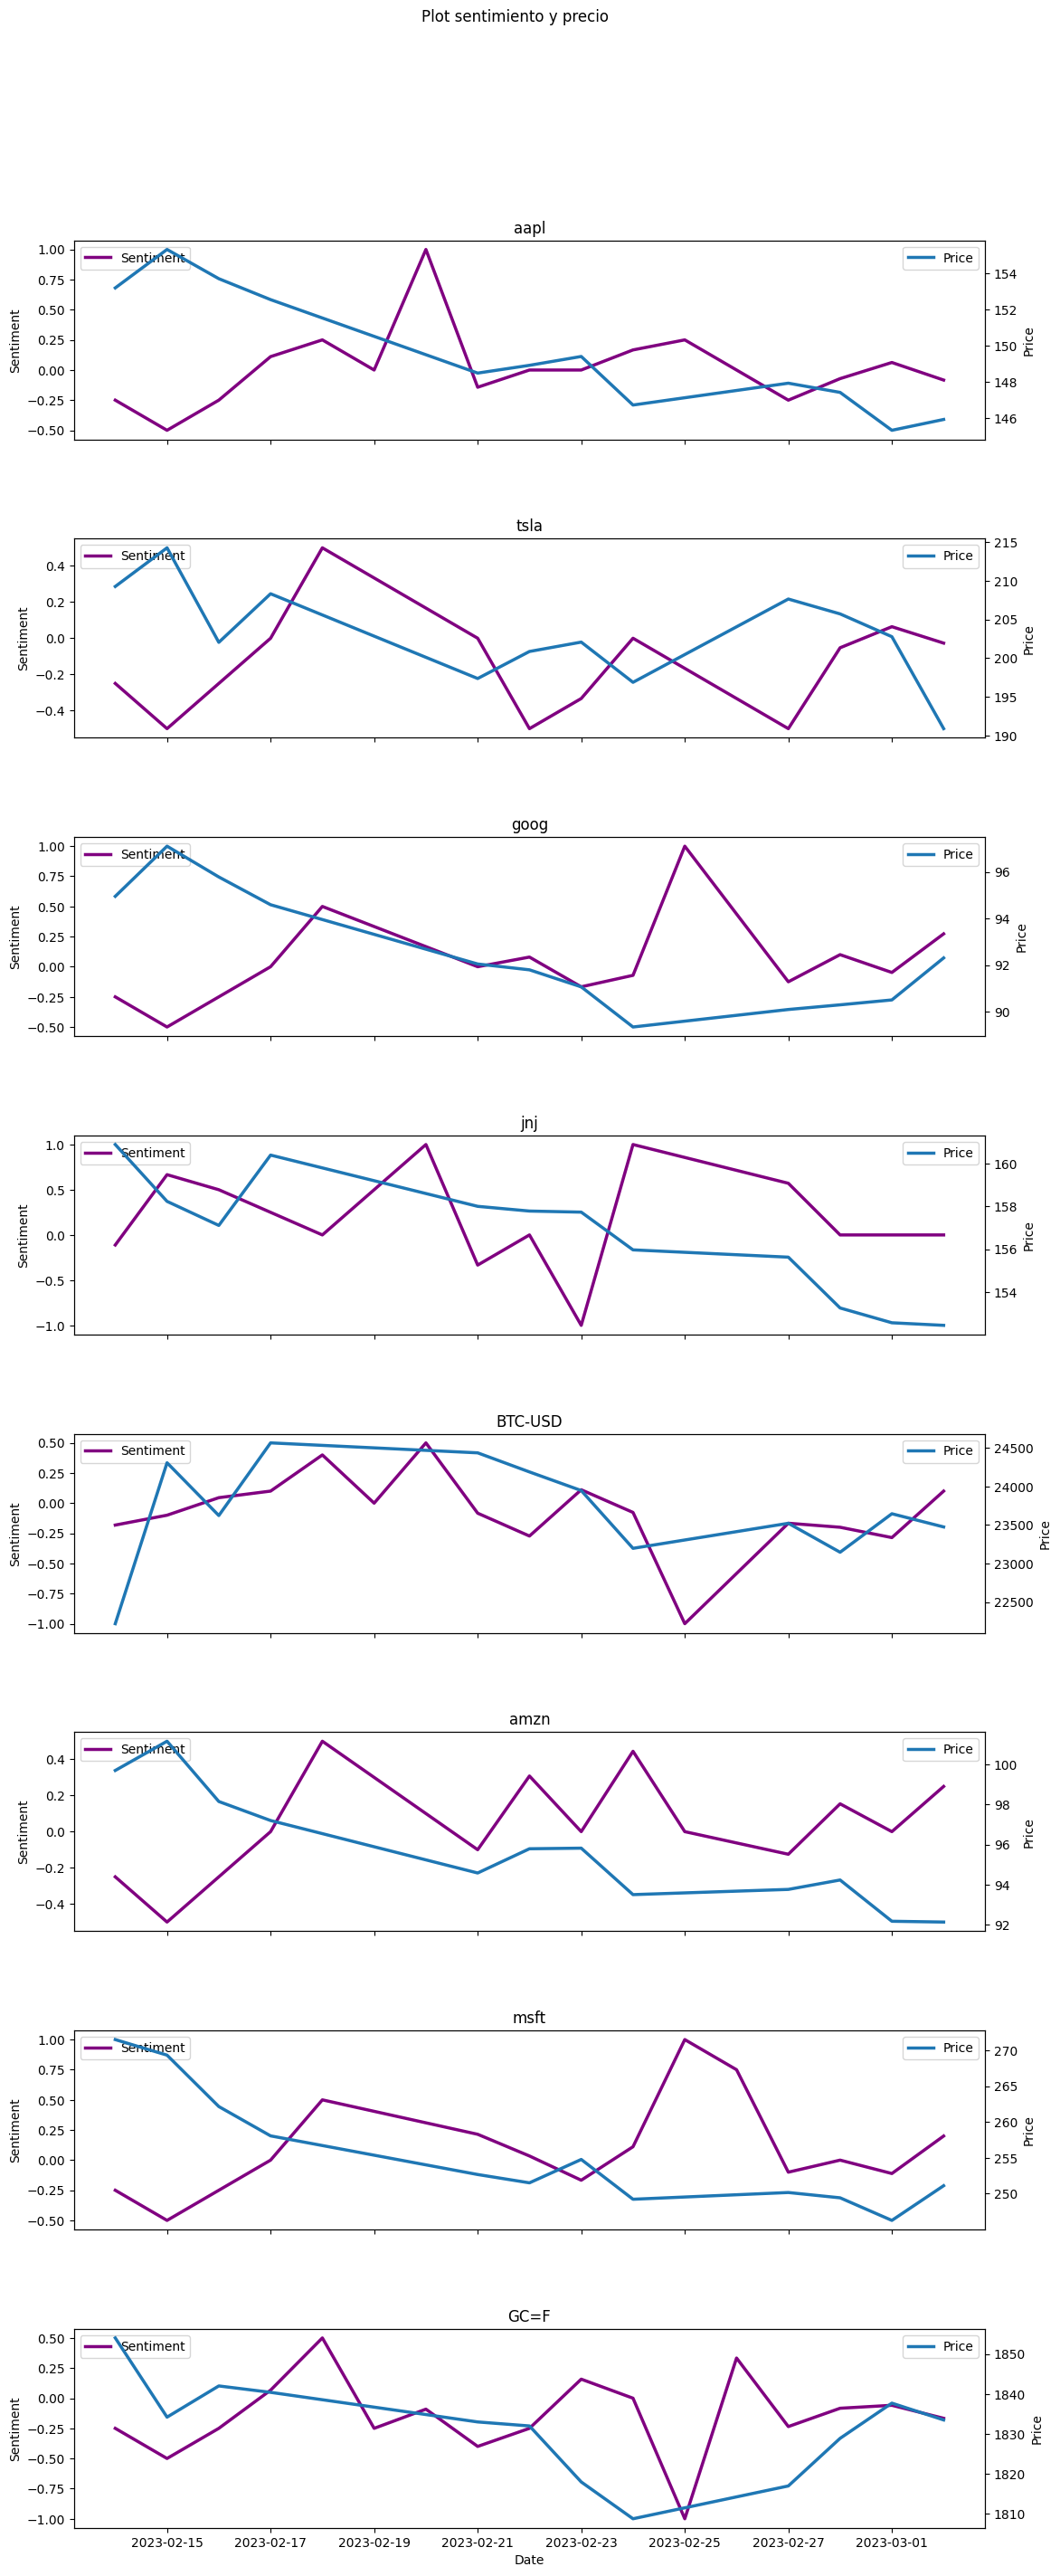

In [16]:


# Figura y ejes para subplots
num_rows = len(df_sent.ticker.unique())
fig, axs = plt.subplots(num_rows, 1, figsize=(13, 4*num_rows), sharex='col',gridspec_kw={'top': 0.9})
plt.subplots_adjust(hspace=0.5)

for i, tick in enumerate(df_sent.ticker.unique()):
    
    # Sentimiento en el eje Y izquierdo
    ax1 = axs[i]
    sns.lineplot(ax=ax1, data=df_sent[df_sent['ticker'] == tick], y='sentiment', x='date',
                  hue='ticker', palette=['purple'], linewidth=2.5,errorbar=('ci', False),legend=False,label='Sentiment')
    ax1.legend(loc='upper left')

    # Sentimiento en el eje Y izquierdo
    ax2 = ax1.twinx()
    
    # Precio en el eje Y derecho
    sns.lineplot(ax=ax2, data=df_precios[['Date', tick]], y=tick, x='Date', linewidth=2.5,label='Price',errorbar=('ci', False))
    
    # Título y labels para los ejes
    ax1.set_title(tick)
    ax1.set_ylabel('Sentiment')
    ax2.set_ylabel('Price')
axs[num_rows-1].set_xlabel('Date')

# No consigo quitar el padding debajo del título
plt.suptitle('Plot sentimiento y precio')


### Stacked bar plot

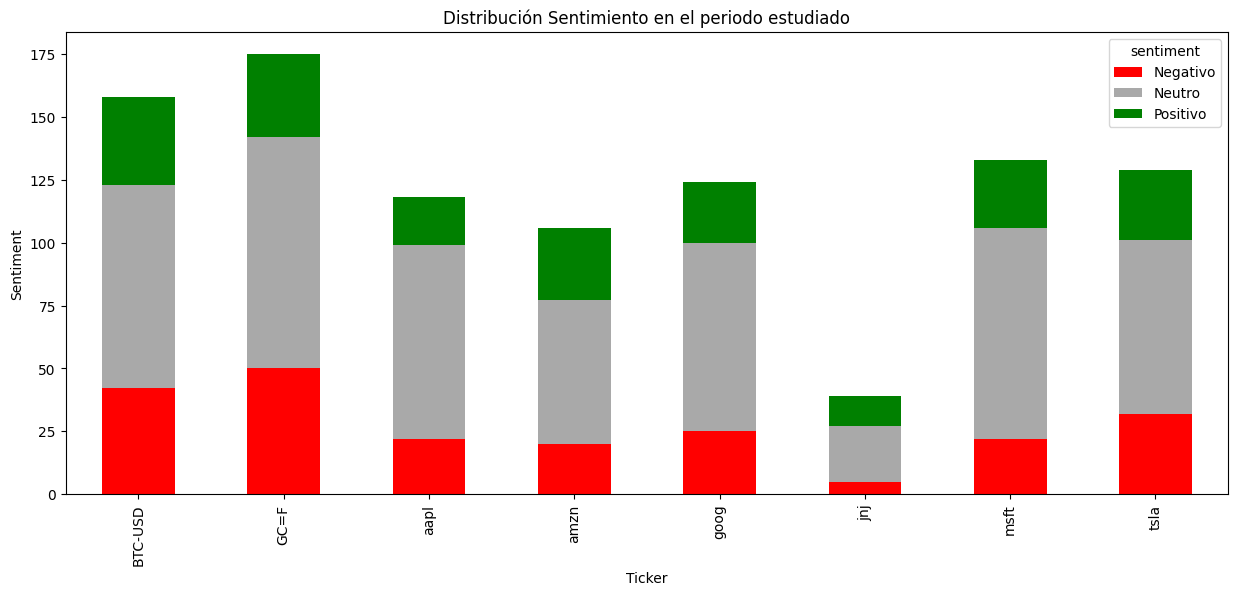

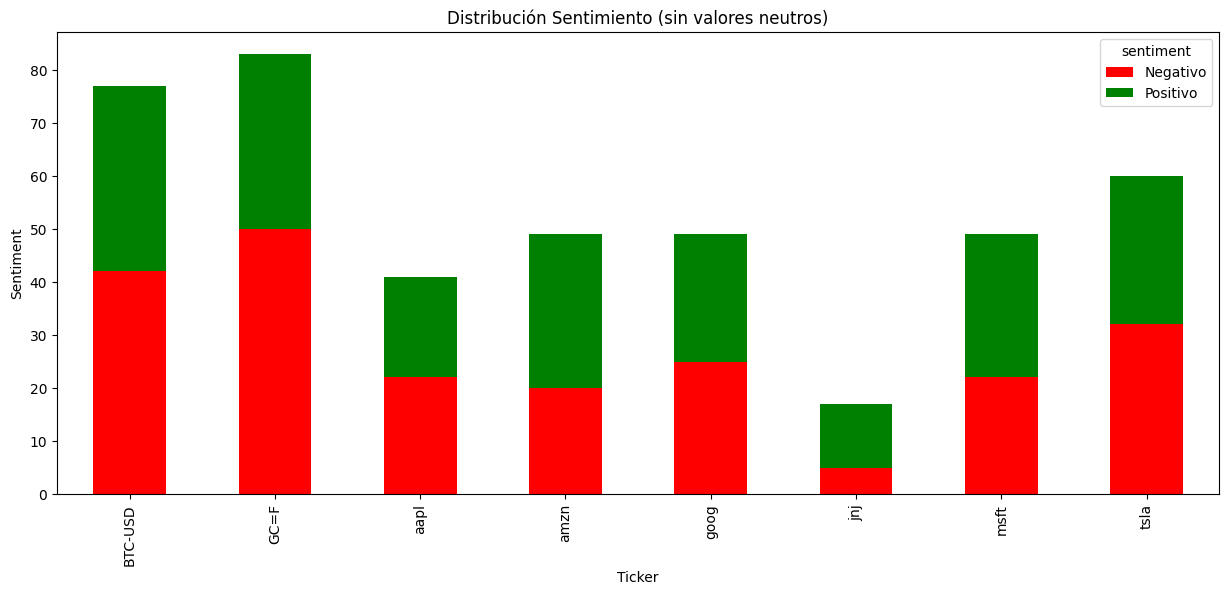

In [9]:
df_crosstab = df_sent.copy()
df_crosstab['sentiment'].replace({1:'Positivo',0:'Neutro',-1:'Negativo'},inplace=True)


pd.crosstab(df_crosstab['ticker'], df_crosstab['sentiment']).plot(kind='bar',
                                                                  stacked=True,color=['red','darkgrey','green'],
                                                                  )
plt.title('Distribución Sentimiento en el periodo estudiado')
plt.xlabel('Ticker')
plt.ylabel('Sentiment');

# Lo mismo sin valores neutros

df_no_neutral = df_crosstab.copy()
df_no_neutral = df_no_neutral[df_no_neutral.sentiment != 'Neutro']

pd.crosstab(df_no_neutral['ticker'], df_no_neutral['sentiment']).plot(kind='bar',
                                                                  stacked=True,color=['red','green'],
                                                                  )
plt.title('Distribución Sentimiento (sin valores neutros)')
plt.xlabel('Ticker')
plt.ylabel('Sentiment');

# Correlación

In [10]:
# Uso pivot para poder combinar el DF de precios y el de sentiment
df_pivot = pd.pivot_table(df_sent, values='sentiment', index='date', columns='ticker').reset_index().sort_values('date')

# Uso interpolate en lugar de bfill para imputar valores medios entre Nan
df_pivot.iloc[:,1:] = df_pivot.iloc[:,1:].interpolate(axis=1)
# bfill un valor suelto
df_pivot.fillna(method='bfill',inplace=True)
df_pivot.columns += '_sentiment'
df_pivot.head(40)


ticker,date_sentiment,BTC-USD_sentiment,GC=F_sentiment,aapl_sentiment,amzn_sentiment,goog_sentiment,jnj_sentiment,msft_sentiment,tsla_sentiment
0,2023-02-14,-0.181818,-0.250000,-0.250000,-0.250000,-0.250000,-0.111111,-0.250000,-0.250000
1,2023-02-15,-0.100000,-0.500000,-0.500000,-0.500000,-0.500000,0.666667,-0.500000,-0.500000
2,2023-02-16,0.045455,-0.250000,-0.250000,-0.250000,-0.250000,0.500000,-0.250000,-0.250000
3,2023-02-17,0.100000,0.066667,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000
4,2023-02-18,0.400000,0.500000,0.250000,0.500000,0.500000,0.000000,0.500000,0.500000
5,2023-02-19,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2023-02-20,0.500000,-0.090909,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,2023-02-21,-0.083333,-0.400000,-0.142857,-0.100000,0.000000,-0.333333,0.214286,0.000000
8,2023-02-22,-0.272727,-0.250000,0.000000,0.307692,0.080000,0.000000,0.034483,-0.500000
9,2023-02-23,0.111111,0.157895,0.000000,0.000000,-0.166667,-1.000000,-0.166667,-0.333333


In [11]:
# Combino los DF para sacar correlación
merged_df = pd.merge(df_pivot, df_precios, right_on='Date',left_on='date_sentiment').drop(columns='Date')
merged_df.head(3)

,date_sentiment,BTC-USD_sentiment,GC=F_sentiment,aapl_sentiment,amzn_sentiment,goog_sentiment,jnj_sentiment,msft_sentiment,tsla_sentiment,aapl,tsla,goog,jnj,BTC-USD,amzn,msft,GC=F
0,2023-02-14,-0.181818,-0.25,-0.25,-0.25,-0.25,-0.111111,-0.25,-0.25,153.199997,209.250000,94.949997,160.882858,22220.804688,99.699997,271.490021,1854.000000
1,2023-02-15,-0.100000,-0.50,-0.50,-0.50,-0.50,0.666667,-0.50,-0.50,155.330002,214.240005,97.099998,158.231918,24307.841797,101.160004,269.320007,1834.199951
2,2023-02-16,0.045455,-0.25,-0.25,-0.25,-0.25,0.500000,-0.25,-0.25,153.710007,202.039993,95.779999,157.110001,23623.474609,98.150002,262.149994,1842.000000


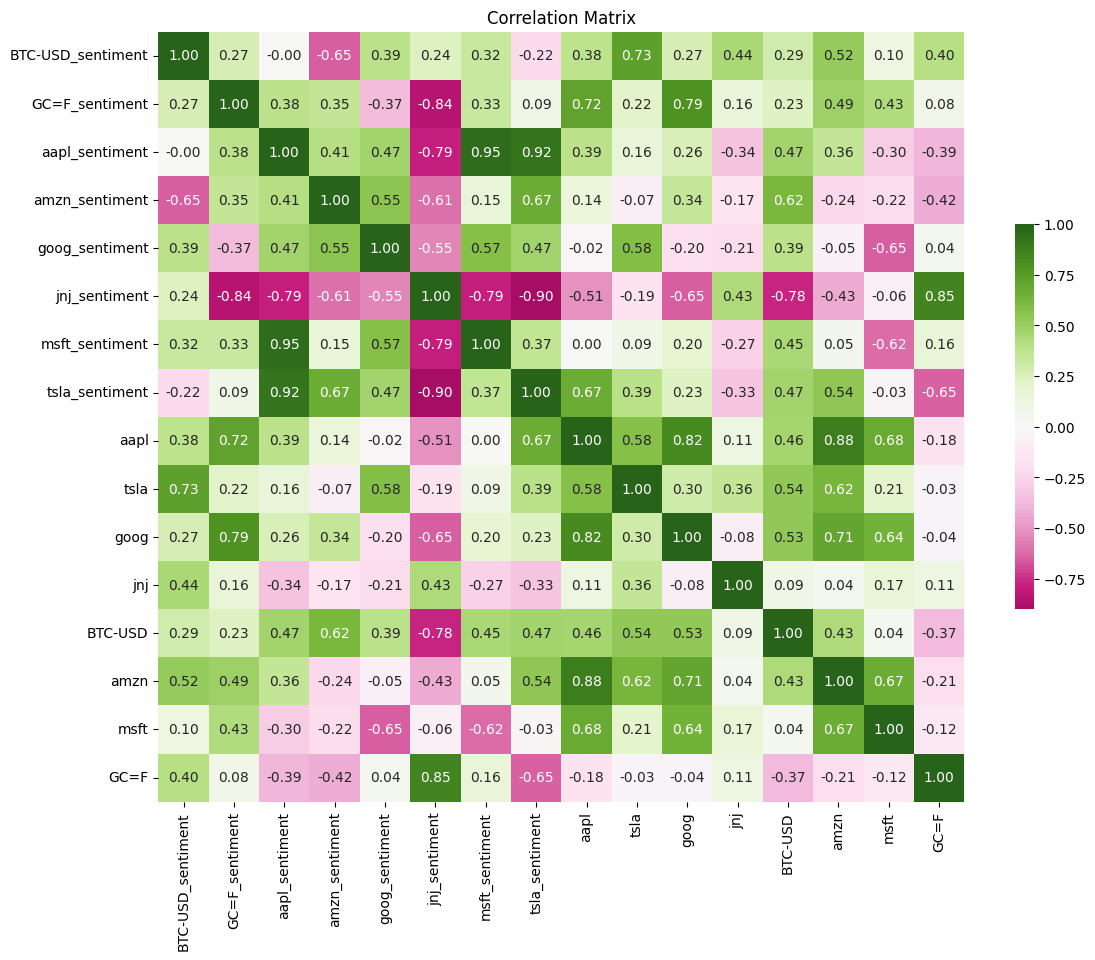

In [12]:
# Matriz de correlación y heatmap
corr_matrix = merged_df.iloc[:,1:].pct_change().corr()
fig,ax = plt.subplots(figsize=(13,10))
sns.heatmap(corr_matrix, cmap="PiYG", fmt='.2f',annot=True,center=0,cbar_kws={'shrink':.5})
plt.title("Correlation Matrix")
plt.show()